In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
reviews = pd.read_csv("/home/simplon/Téléchargements/fandango_scores.csv")

In [5]:
#Déclaration de norm_views et col_norm :

col_norm=['RT_user_norm','Metacritic_user_nom','IMDB_norm','Fandango_Ratingvalue','Fandango_Stars']

norm_views = reviews[['FILM','RT_user_norm','Metacritic_user_nom','IMDB_norm','Fandango_Ratingvalue','Fandango_Stars']]

In [6]:
norm_views=norm_views.set_index('FILM',drop=True)
norm_views.head()

,RT_user_norm,Metacritic_user_nom,IMDB_norm,Fandango_Ratingvalue,Fandango_Stars
FILM,,,,,
Avengers: Age of Ultron (2015),4.3,3.55,3.90,4.5,5.0
Cinderella (2015),4.0,3.75,3.55,4.5,5.0
Ant-Man (2015),4.5,4.05,3.90,4.5,5.0
Do You Believe? (2015),4.2,2.35,2.70,4.5,5.0
Hot Tub Time Machine 2 (2015),1.4,1.70,2.55,3.0,3.5


In [7]:
#Réglage Seaborn
sns.set_context("notebook",rc={'xtick.labelsize':11,'ytick.labelsize':11})
palette=sns.color_palette("Set1")
sns.set_palette(palette)

In [8]:
#Diagrammes en barres et graphiques à nuage
#de points
bar_height= norm_views[:].iloc[0].values
bar_height

array([4.3 , 3.55, 3.9 , 4.5 , 5.  ])

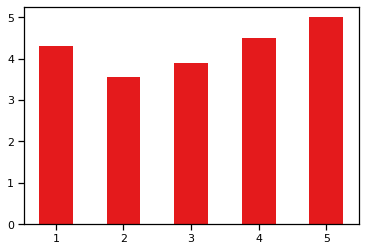

In [9]:
width=0.5
bar_position=range(1,6)
fig,ax=plt.subplots()
ax.bar(bar_position,bar_height,width)
plt.show()

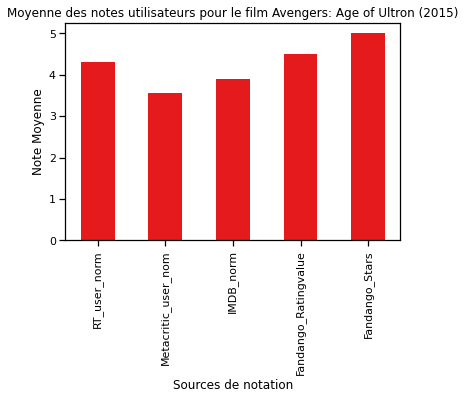

In [10]:
#Diagrammes en barres

width=0.5
bar_position=range(1,6)
fig,ax=plt.subplots()
ax.bar(bar_position,bar_height,width)
ax.set_xticks(bar_position)
ax.set_xticklabels(col_norm,rotation=90)
ax.set_xlabel('Sources de notation')
ax.set_ylabel('Note Moyenne')
ax.set_title('Moyenne des notes utilisateurs pour le film Avengers: Age of Ultron (2015)')
plt.show()


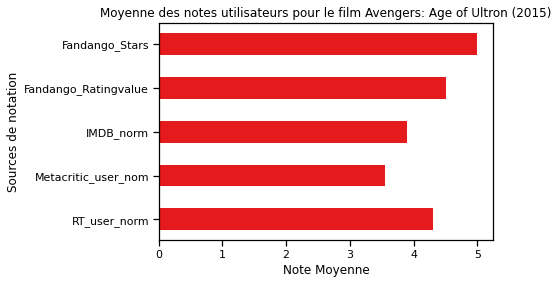

In [11]:
#Aligner l'intitulé et le trait sur l'axe x
#Diagramme en barres horizontales

fig,ax=plt.subplots()
ax.barh(bar_position,bar_height,width)
ax.set_yticks(bar_position)
ax.set_yticklabels(col_norm)
ax.set_ylabel('Sources de notation')
ax.set_xlabel('Note Moyenne')
ax.set_title('Moyenne des notes utilisateurs pour le film Avengers: Age of Ultron (2015)')
plt.show()

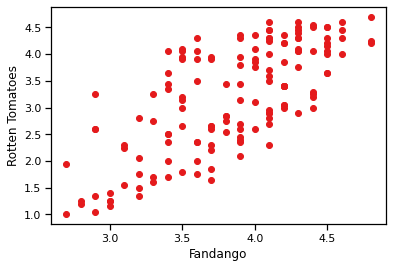

In [12]:
#Graphique à nuage de points

fig , ax = plt.subplots()

valeurs_x=norm_views['Fandango_Ratingvalue']
valeurs_y=norm_views['RT_user_norm']

ax.scatter(valeurs_x,valeurs_y)

ax.set_xlabel('Fandango')
ax.set_ylabel('Rotten Tomatoes')
plt.show()

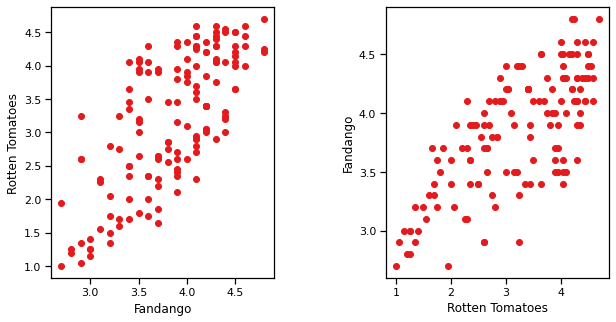

In [14]:
#Intervertir les Axes

fig = plt.figure(figsize=[10,5])
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

valeurs_x=norm_views['Fandango_Ratingvalue']
valeurs_y=norm_views['RT_user_norm']

ax1.scatter(valeurs_x,valeurs_y)
ax1.set_xlabel('Fandango')
ax1.set_ylabel('Rotten Tomatoes')

ax2.scatter(valeurs_y,valeurs_x)
ax2.set_xlabel('Rotten Tomatoes')
ax2.set_ylabel('Fandango')

fig.subplots_adjust(wspace=0.5,hspace=None)

plt.show()

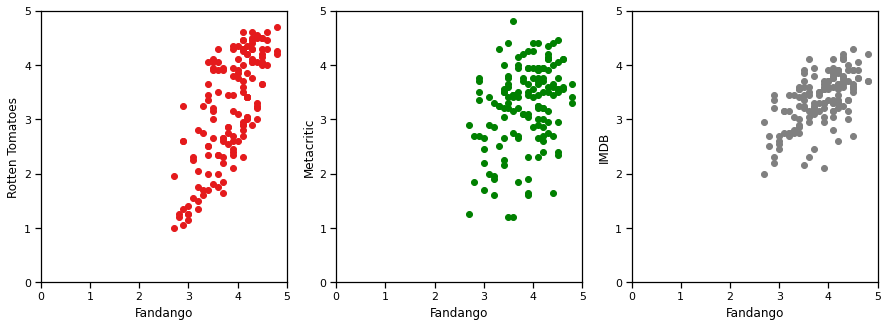

In [18]:
#Comparaison de corrélations

fig=plt.figure(figsize=[15,5])
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)

valeurs_x=norm_views['Fandango_Ratingvalue']
valeurs_y=norm_views['RT_user_norm']

ax1.scatter(valeurs_x,valeurs_y)
ax1.set_xlabel('Fandango')
ax1.set_ylabel('Rotten Tomatoes')
ax1.set_xlim(0,5)
ax1.set_ylim(0,5)

ax2.scatter(valeurs_x,norm_views['Metacritic_user_nom'],color='green')
ax2.set_xlabel('Fandango')
ax2.set_ylabel('Metacritic')
ax2.set_xlim(0,5)
ax2.set_ylim(0,5)

ax3.scatter(valeurs_x,norm_views['IMDB_norm'],color='grey')
ax3.set_xlabel('Fandango')
ax3.set_ylabel('IMDB')
ax3.set_xlim(0,5)
ax3.set_ylim(0,5)
plt.show()

In [21]:
##Distribution de fréquences
imdb_distribution= norm_views['IMDB_norm'].value_counts().sort_index()

In [22]:
imdb_distribution

2.00     1
2.10     1
2.15     1
2.20     1
2.30     2
2.45     2
2.50     1
2.55     1
2.60     2
2.70     4
2.75     5
2.80     2
2.85     1
2.90     1
2.95     3
3.00     2
3.05     4
3.10     1
3.15     9
3.20     6
3.25     4
3.30     9
3.35     7
3.40     1
3.45     7
3.50     4
3.55     7
3.60    10
3.65     5
3.70     8
3.75     6
3.80     3
3.85     4
3.90     9
3.95     2
4.00     1
4.05     1
4.10     4
4.15     1
4.20     2
4.30     1
Name: IMDB_norm, dtype: int64

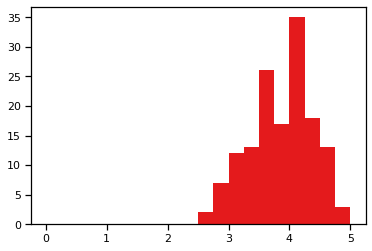

In [24]:
#Distribution de fréquences

fig,ax=plt.subplots()
ax.hist(norm_views['Fandango_Ratingvalue'],range=(0,5),bins=20)
plt.show()

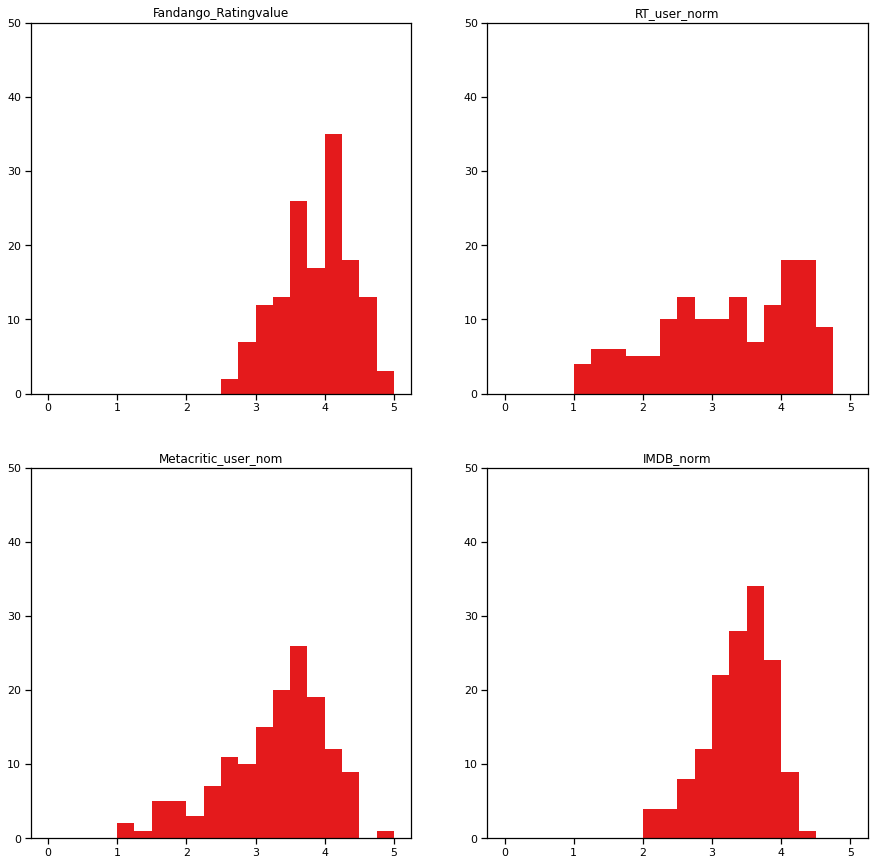

In [28]:
#Comparaison d'histogrammes
fig=plt.figure(figsize=[15,15])
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)

ax1.hist(norm_views['Fandango_Ratingvalue'],bins=20,range=(0,5))

ax2.hist(norm_views['RT_user_norm'],bins=20,range=(0,5))

ax3.hist(norm_views['Metacritic_user_nom'],bins=20,range=(0,5))

ax4.hist(norm_views['IMDB_norm'],bins=20,range=(0,5))

ax4.set_ylim(0,50)
ax3.set_ylim(0,50)
ax2.set_ylim(0,50)
ax1.set_ylim(0,50)

ax1.set_title('Fandango_Ratingvalue')
ax2.set_title('RT_user_norm')
ax3.set_title('Metacritic_user_nom')
ax4.set_title('IMDB_norm')

fig.subplots_adjust(wspace=None,hspace=0.2)

plt.show()

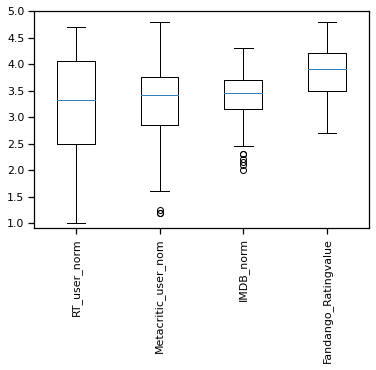

In [32]:
#Plusieurs diagrammes à boites 
fig,ax=plt.subplots()
num_cols=['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm','Fandango_Ratingvalue']
ax.boxplot(norm_views[num_cols])
#On peut rajouter showfliers=False comme argument dans boxplot
#Pour retirer les valeurs abérentes représenter par des ronds sur le graphique

ax.set_xticklabels(num_cols,rotation=90)
ax.set_ylim(0.9,5)
plt.show()

<h1>Partie bonus avec Seanborn<h1/>

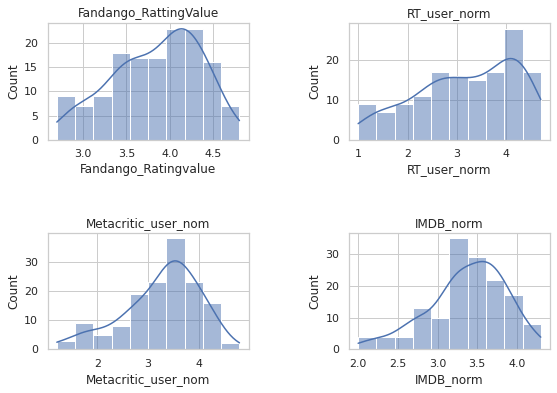

In [60]:
#Comparaison de d'histogrammes avec Seaborn 


sns.set(style="whitegrid",color_codes=True)
plt.figure(figsize=[9,6])
plt.subplots_adjust(wspace=0.5,hspace=0.8)
plt.subplot(221)
sns.histplot(norm_views['Fandango_Ratingvalue'],bins=10,kde=True)
plt.title("Fandango_RattingValue")

plt.subplot(222)
sns.histplot(norm_views['RT_user_norm'],bins=10,kde=True)
plt.title('RT_user_norm')

plt.subplot(223)
sns.histplot(norm_views['Metacritic_user_nom'],bins=10,kde=True)
plt.title('Metacritic_user_nom')

plt.subplot(224)
sns.histplot(norm_views['IMDB_norm'],bins=10,kde=True)
plt.title('IMDB_norm')



plt.show()

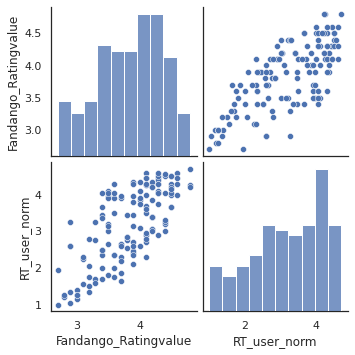

In [47]:
#Comparaison de corrélations
sns.set(style="white",color_codes=True)
sns.pairplot(data=norm_views[['Fandango_Ratingvalue','RT_user_norm']],diag_kws=dict(bins=10))
plt.show()

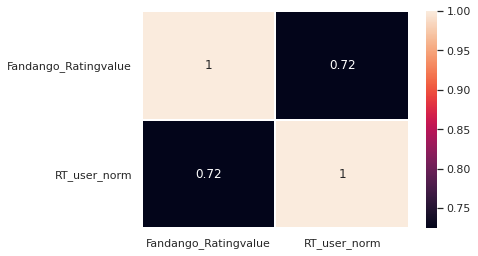

In [52]:
#Comparaison de corrélations
correlation=norm_views[['Fandango_Ratingvalue','RT_user_norm']].corr()
plt.figure()
plt.subplot(111)
sns.heatmap(correlation,annot=True,linewidths=1.0)
plt.show()

On constate qu'il y as une grosse corrélation entre la note de Fandango et celle de Rotten Tomatoes. On peut conclure que 0.72 est une corrélation, mais pas suffisantes pour établir un lien avec certitude.

<h1> Plusieurs diagrammes à boites <h1/>

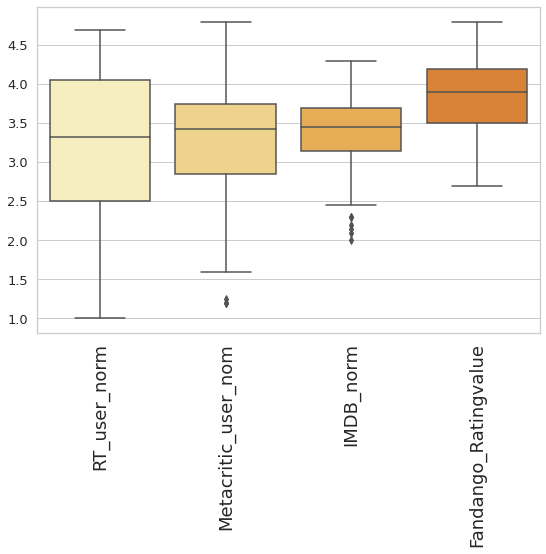

In [71]:
donnees_boxplot=norm_views[['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm','Fandango_Ratingvalue']]
plt.figure(figsize=[9,6])
sns.set_context("notebook",rc={'xtick.labelsize':18,'ytick.labelsize':13})
palette=sns.color_palette("YlOrBr")
sns.set_palette(palette)
plt.subplot(111)

sns.boxplot(data=donnees_boxplot,dodge=True)
plt.xticks(rotation=90)
plt.show()
